<a href="https://colab.research.google.com/github/ridhikapila27/Deep_learning/blob/main/Lab7_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
#import libraries
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

Conv2d(3, 15, kernel_size=(5, 5), stride=(1, 1))
 
Size of weights: torch.Size([15, 3, 5, 5])
Size of bias: torch.Size([15])


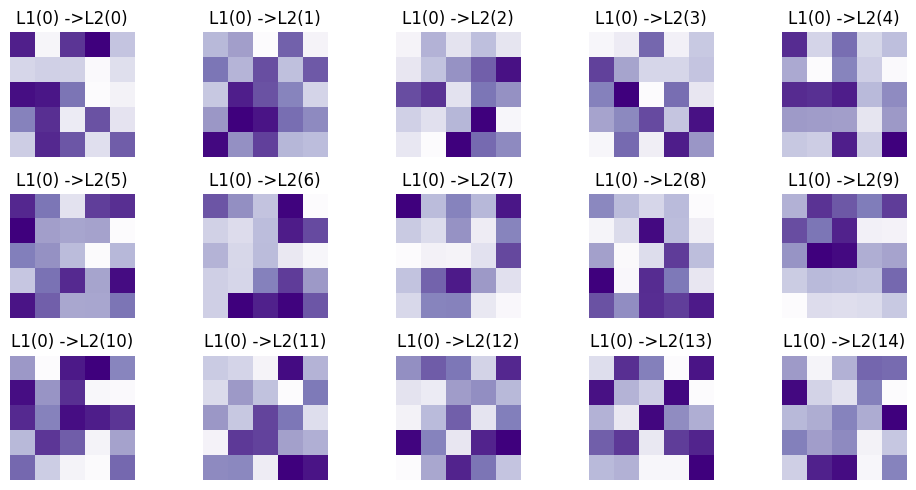

In [21]:
#create a conv2d class instance with parameters
#parameters
inChans = 3 #RGB
outChans = 15
krnSize = 5 #should be an odd number
stride = 1
padding = 0
#create the instance (cf nn.linear)
c = nn.Conv2d(inChans,outChans,krnSize,stride,padding)
#lets have a look at it
print(c)
print(' ')
              
#Conv2d(3, 15, kernel_size=(5, 5), stride=(1, 1))
#check out its weight tensor; what are the dimensions ?
print('Size of weights: '+ str(c.weight.shape))
print('Size of bias: '+ str(c.bias.shape))
#Size of weights: torch.Size([15, 3, 5, 5])
#Size of bias: torch.Size([15])
#what do these kernels look like ?
fig,axs= plt.subplots(3,5,figsize=(10,5))
for i,ax in enumerate(axs.flatten()):
  ax.imshow(torch.squeeze(c.weight[i,0,:,:]).detach(),cmap='Purples')
  ax.set_title('L1(0) ->L2(%s)'%i)
  ax.axis('off')
plt.tight_layout()
plt.show()


torch.Size([1, 3, 64, 64])
(64, 64, 3, 1)


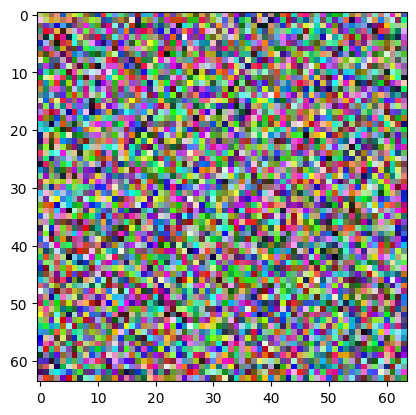

In [22]:
#size of the image (N, RGB, height, width)
imsize = (1,3,64,64)
img = torch.rand(imsize)
#pytorch wants channels first,but matplotlib wants channels last
#therefore, tensors must be permuted to visualize
img2view = img.permute(2,3,1,0).numpy()
print(img.shape)
print(img2view.shape)
plt.imshow(np.squeeze(img2view))

torch.Size([1, 3, 64, 64])
torch.Size([1, 15, 60, 60])


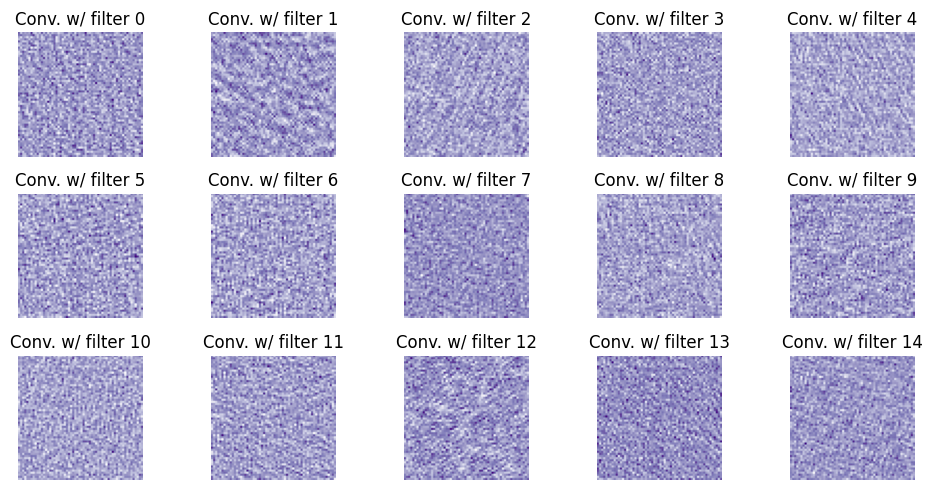

In [24]:
#convolve teh image with filter bank (set of 'outChans kernels)
convRes=c(img)
print(img.shape)
print(convRes.shape)
torch.Size([1, 3, 64, 64])
torch.Size([1, 15, 60, 60])
#what do convolved images look like?
fig,axs = plt.subplots(3,5,figsize=(10,5))
for i,ax in enumerate(axs.flatten()):
  I = torch.squeeze(convRes[0,i,:,:]).detach()
  ax.imshow(I,cmap='Purples')
  ax.set_title('Conv. w/ filter %s' %i)
  ax.axis('off')
plt.tight_layout()
plt.show()